In [1]:
from scipy.linalg import triu
print("Successfully imported triu from scipy.linalg")


Successfully imported triu from scipy.linalg


In [3]:
import scipy  # This imports the scipy module itself
from scipy.linalg import triu  # Continue to import specific functions if needed
import gensim
import numpy

print("SciPy version:", scipy.__version__)
print("Gensim version:", gensim.__version__)
print("NumPy version:", numpy.__version__)


SciPy version: 1.12.0
Gensim version: 4.3.2
NumPy version: 1.26.4


In [5]:
import pandas as pd
import numpy as np
import gensim.downloader as api

# Load the GloVe model
glove_model = api.load("glove-wiki-gigaword-100")  # 100-dimensional GloVe model

# Function to convert text to GloVe vector
def text_to_vector(text):
    words = text.split()
    word_vectors = [glove_model[word] for word in words if word in glove_model]
    if not word_vectors:  # Check if there's at least one valid vector
        return np.zeros(100)  # Return zero vector if no words have embeddings
    return np.mean(word_vectors, axis=0)  # Return the mean vector

# Load your dataset
df = pd.read_csv('../data/enriched_dataset_with_entities.csv')

# Identify columns containing entities
# Assuming all columns you need end with '_entities'
entity_columns = [col for col in df.columns if col.endswith('_entities')]

# Create a new DataFrame to hold vector representations
df_vectors = pd.DataFrame()

for column in entity_columns:
    # Extract and combine all entities from the column, handling lists of tuples (entity, type)
    df[column] = df[column].apply(lambda x: eval(x) if isinstance(x, str) else x)  # Ensure non-string lists are evaluated
    df[column] = df[column].apply(lambda x: ' '.join([entity[0] for entity in x]))  # Join all entity names into a single string
    df_vectors[column + '_vec'] = df[column].apply(text_to_vector)  # Apply vector conversion

# Save the vector DataFrame to a new CSV file for further analysis
df_vectors.to_csv('path_to_vectors.csv', index=False)

# Display the first few rows of the vectors DataFrame
print(df_vectors.head())


[==================================================] 100.0% 128.1/128.1MB downloaded
           Area_tokens_lemmatized_clean_entities_vec  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [-0.88149, -0.10417, 0.53203, 0.37788, -0.8337...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

  Popular Facilities_tokens_lemmatized_clean_entities_vec  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        
2  [-0.15643601, 0.111294985, 0.16179751, -0.0746...        
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        
4  [-0.15643601, 0.111294985, 0.16179751, -0.0746...        

    Description_tokens_lemmatized_clean_entities_vec  \
0  [-0.28103703, 0.11994, 0.27303734, -0.34195977...   
1  [-0.20563653, 0.06594069, 0.37535125, -0.24999...   
2  [-0.038394284, 0.08575288, 0.3865978, -0

In [6]:
# Save the vector DataFrame to a new CSV file for further analysis
df_vectors.to_csv('../data/path_to_vectors.csv', index=False)

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
df_vectors = pd.read_csv('../data/path_to_vectors.csv')  # Adjust path as necessary

# Function to convert string representations of lists into numpy arrays
def string_to_array(s):
    try:
        return np.array([float(item) for item in s.strip('[]').split(',') if item.strip()])
    except:
        return None  # Return None for any conversion errors

# Apply conversion function to each column in the dataframe
for column in df_vectors.columns:
    df_vectors[column] = df_vectors[column].apply(string_to_array)

# Remove any rows where conversion failed (i.e., contains None)
df_vectors.dropna(inplace=True)

# Ensuring all arrays are of the same length by padding shorter arrays
max_length = df_vectors.applymap(lambda x: len(x)).max().max()  # Find the maximum length of arrays in the DataFrame
def pad_array(arr):
    if len(arr) < max_length:
        return np.pad(arr, (0, max_length - len(arr)), mode='constant', constant_values=0)
    return arr

# Pad arrays in the DataFrame
for column in df_vectors.columns:
    df_vectors[column] = df_vectors[column].apply(pad_array)

# Create a 2D numpy array suitable for clustering
X = np.stack(df_vectors.apply(lambda row: np.concatenate(row.values), axis=1).values)

# Initialize and apply the Agglomerative Clustering model
clustering = AgglomerativeClustering(distance_threshold=0.5, n_clusters=None, linkage='ward')
labels = clustering.fit_predict(X)

# Generate the linkage matrix for dendrogram
Z = linkage(X, method='ward')

# Plot the dendrogram to visualize the clustering
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_24108\4013034429.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  max_length = df_vectors.applymap(lambda x: len(x)).max().max()  # Find the maximum length of arrays in the DataFrame


ValueError: need at least one array to stack

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
df_vectors = pd.read_csv('../data/path_to_vectors.csv')  # Adjust path as necessary

# Convert string representations of lists into numpy arrays
def string_to_array(s):
    try:
        return np.array([float(item) for item in s.strip('[]').split(',') if item.strip()])
    except Exception as e:
        return None

# Apply conversion function to each column in the dataframe
for column in df_vectors.columns:
    df_vectors[column] = df_vectors[column].apply(string_to_array)

# Drop rows with None values due to conversion failures
df_vectors.dropna(inplace=True)

# Remove rows that don't meet array type and length uniformity
if not df_vectors.empty:
    length_check = df_vectors.apply(lambda x: len(x[0]) if isinstance(x[0], np.ndarray) else 0, axis=1)
    common_length = length_check.mode()[0]  # Most common length
    df_vectors = df_vectors[length_check == common_length]

if df_vectors.empty:
    raise ValueError("DataFrame is empty after preprocessing.")

# Convert list of arrays to a 2D numpy array
X = np.stack(df_vectors.apply(lambda row: np.concatenate([x for x in row if isinstance(x, np.ndarray)]), axis=1).to_list())

# Initialize and apply the Agglomerative Clustering model
clustering = AgglomerativeClustering(distance_threshold=0.5, n_clusters=None, linkage='ward')
labels = clustering.fit_predict(X)

# Generate the linkage matrix for dendrogram
Z = linkage(X, method='ward')

# Plot the dendrogram to visualize the clustering
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


ValueError: DataFrame is empty after preprocessing.

In [ ]:
#below is the code to identify the issues of above 

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
df_vectors = pd.read_csv('../data/path_to_vectors.csv')

# Check initial data types
print("Initial data types:")
print(df_vectors.dtypes)

# Function to safely convert string lists to numpy arrays
def safe_convert(s):
    try:
        # Strip brackets and split the string by commas
        elements = s.strip('[]').split(',')
        # Convert elements to float if they are not empty
        return np.array([float(item) for item in elements if item.strip()], dtype=np.float32)
    except:
        return None

# Apply conversion and drop rows with None (failed conversions)
df_vectors = df_vectors.applymap(safe_convert)
df_vectors.dropna(inplace=True)

# Ensure all arrays are of uniform length
if not df_vectors.empty:
    lengths = df_vectors.applymap(len)
    if (lengths.nunique() == 1).all(axis=None):
        # Stack the arrays if all lengths are equal
        X = np.stack(df_vectors.apply(lambda x: np.concatenate(x), axis=1).values)
        
        # Perform clustering
        clustering = AgglomerativeClustering(distance_threshold=0.5, n_clusters=None, linkage='ward')
        labels = clustering.fit_predict(X)

        # Generate and plot the dendrogram
        Z = linkage(X, method='ward')
        plt.figure(figsize=(12, 8))
        dendrogram(Z)
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('Sample index')
        plt.ylabel('Distance')
        plt.show()
    else:
        print("Error: Arrays do not have uniform lengths.")
else:
    print("Error: DataFrame is empty after preprocessing.")


Initial data types:
Area_tokens_lemmatized_clean_entities_vec                                 object
Popular Facilities_tokens_lemmatized_clean_entities_vec                   object
Description_tokens_lemmatized_clean_entities_vec                          object
Facilities_tokens_lemmatized_clean_entities_vec                           object
Surroundings_tokens_lemmatized_clean_entities_vec                         object
Bathroom Features_tokens_lemmatized_clean_entities_vec                    object
Bedroom Features_tokens_lemmatized_clean_entities_vec                     object
Outdoors_tokens_lemmatized_clean_entities_vec                             object
Room Amenities_tokens_lemmatized_clean_entities_vec                       object
Activities_tokens_lemmatized_clean_entities_vec                           object
Living Area_tokens_lemmatized_clean_entities_vec                          object
Media & Technology_tokens_lemmatized_clean_entities_vec                   object
Food & D

C:\Users\user\AppData\Local\Temp\ipykernel_24108\2052580578.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_vectors = df_vectors.applymap(safe_convert)


In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
df_vectors = pd.read_csv('../data/path_to_vectors.csv')

# Print initial data types
print("Initial data types:")
print(df_vectors.dtypes)

# Improved conversion function to handle string to numpy array conversion more robustly
def safe_convert(s):
    try:
        # Handle potential whitespace or formatting issues
        clean_str = s.strip('[] ').replace(' ', '')
        # Convert the cleaned string to a list of floats
        return np.array([float(item) for item in clean_str.split(',') if item], dtype=np.float32)
    except Exception as e:
        return None  # Return None if conversion fails

# Apply the conversion function to each element in the DataFrame
for column in df_vectors.columns:
    df_vectors[column] = df_vectors[column].apply(safe_convert)

# Check for and remove rows with None values (indicative of failed conversions)
df_vectors.dropna(inplace=True)

# Ensure all arrays are of uniform length before proceeding
if not df_vectors.empty:
    common_length = df_vectors.applymap(len).mode().iloc[0, 0]
    df_vectors = df_vectors[df_vectors.applymap(len).eq(common_length).all(axis=1)]

# Concatenate arrays across rows if they are all of uniform length and non-empty
if not df_vectors.empty:
    X = np.vstack(df_vectors.apply(lambda x: np.concatenate(x.values), axis=1))

    # Clustering
    clustering = AgglomerativeClustering(distance_threshold=0.5, n_clusters=None, linkage='ward')
    labels = clustering.fit_predict(X)

    # Dendrogram
    Z = linkage(X, method='ward')
    plt.figure(figsize=(12, 8))
    dendrogram(Z)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()
else:
    print("DataFrame is still empty after preprocessing.")


Initial data types:
Area_tokens_lemmatized_clean_entities_vec                                 object
Popular Facilities_tokens_lemmatized_clean_entities_vec                   object
Description_tokens_lemmatized_clean_entities_vec                          object
Facilities_tokens_lemmatized_clean_entities_vec                           object
Surroundings_tokens_lemmatized_clean_entities_vec                         object
Bathroom Features_tokens_lemmatized_clean_entities_vec                    object
Bedroom Features_tokens_lemmatized_clean_entities_vec                     object
Outdoors_tokens_lemmatized_clean_entities_vec                             object
Room Amenities_tokens_lemmatized_clean_entities_vec                       object
Activities_tokens_lemmatized_clean_entities_vec                           object
Living Area_tokens_lemmatized_clean_entities_vec                          object
Media & Technology_tokens_lemmatized_clean_entities_vec                   object
Food & D

In [21]:
import pandas as pd
import numpy as np

# Load the dataset
df_vectors = pd.read_csv('../data/path_to_vectors.csv')

# Display the first few rows to understand the actual content
print("Sample data from the DataFrame:")
print(df_vectors.head())

# Define a function to try converting a string to a numpy array
def safe_convert(s):
    try:
        # Assuming the format might include extra spaces or non-numeric entries that need handling
        array = np.array([float(item) for item in s.strip('[]').split(',') if item.strip().replace('.', '', 1).isdigit()])
        return array if array.size > 0 else None
    except Exception as e:
        print(f"Failed to convert {s}: {e}")
        return None

# Test the conversion on a small sample of the data
for column in df_vectors.columns:
    print(f"\nTesting conversion for {column}:")
    df_vectors[column] = df_vectors[column].apply(safe_convert)
    print(df_vectors[column].dropna().head())

# Identify if any data remains
if df_vectors.dropna().empty:
    print("\nNo valid data remains after conversion. Check the conversion logic and data format.")
else:
    print("\nData successfully converted and non-empty.")

# Optionally, simplify the process to check the lengths and uniformity without dropping data
lengths = df_vectors.applymap(lambda x: len(x) if isinstance(x, np.ndarray) else 0)
print("\nData lengths:")
print(lengths.describe())


Sample data from the DataFrame:
           Area_tokens_lemmatized_clean_entities_vec  \
0  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...   
1  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...   
2  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...   
3  [-8.8149e-01 -1.0417e-01  5.3203e-01  3.7788e-...   
4  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...   

  Popular Facilities_tokens_lemmatized_clean_entities_vec  \
0  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...        
1  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...        
2  [-0.15643601  0.11129498  0.16179751 -0.074655...        
3  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...        
4  [-0.15643601  0.11129498  0.16179751 -0.074655...        

    Description_tokens_lemmatized_clean_entities_vec  \
0  [-0.28103703  0.11994     0.27303734 -0.341959...   
1  [-0.20563653  0.06594069  0.37535125 -0.249998...   
2  [-3.8394284e-02  8.5752882e-02  3.8659781e-01 ...   
3  [-0.23434     0.0786454   0.56239504 

C:\Users\user\AppData\Local\Temp\ipykernel_24108\736830732.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  lengths = df_vectors.applymap(lambda x: len(x) if isinstance(x, np.ndarray) else 0)


C:\Users\user\AppData\Local\Temp\ipykernel_24108\3848102919.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_empty_columns = df_vectors.applymap(lambda x: x.size > 0).any()
C:\Users\user\AppData\Local\Temp\ipykernel_24108\3848102919.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X = np.stack(df_vectors.apply(lambda x: np.concatenate(x), axis=1).values)


Columns with non-empty arrays: Area_tokens_lemmatized_clean_entities_vec                                 True
Popular Facilities_tokens_lemmatized_clean_entities_vec                   True
Description_tokens_lemmatized_clean_entities_vec                          True
Facilities_tokens_lemmatized_clean_entities_vec                           True
Surroundings_tokens_lemmatized_clean_entities_vec                         True
Bathroom Features_tokens_lemmatized_clean_entities_vec                    True
Bedroom Features_tokens_lemmatized_clean_entities_vec                     True
Outdoors_tokens_lemmatized_clean_entities_vec                             True
Room Amenities_tokens_lemmatized_clean_entities_vec                       True
Activities_tokens_lemmatized_clean_entities_vec                           True
Living Area_tokens_lemmatized_clean_entities_vec                          True
Media & Technology_tokens_lemmatized_clean_entities_vec                   True
Food & Drink_tokens_l

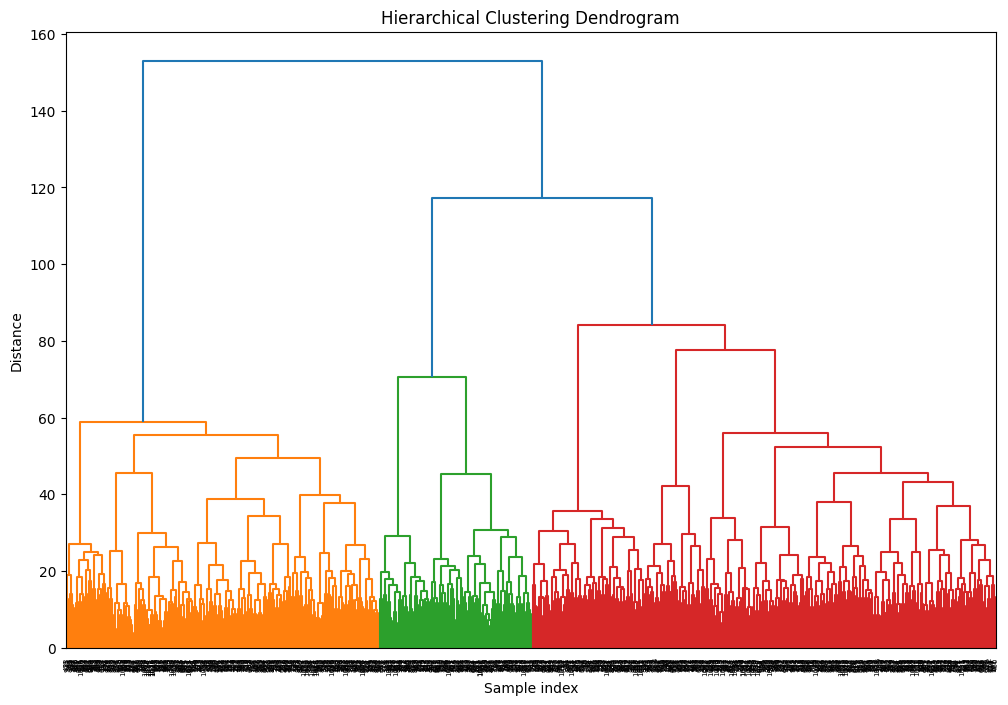

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

def convert_to_floats(list_str):
    """ Convert a string representation of a list of floats to a numpy array. """
    try:
        # Remove brackets and split the string by space
        list_str = list_str.strip('[]')
        # Convert strings to float
        float_array = np.array([float(num) for num in list_str.split() if num.strip()], dtype=np.float32)
        return float_array
    except Exception as e:
        print(f"Error converting {list_str}: {e}")
        return np.array([])  # Return an empty array in case of an error

# Load the dataset
df_vectors = pd.read_csv('../data/path_to_vectors.csv')

# Apply the conversion to each column
for column in df_vectors.columns:
    df_vectors[column] = df_vectors[column].apply(convert_to_floats)

# Check if any arrays are non-empty
non_empty_columns = df_vectors.applymap(lambda x: x.size > 0).any()
print("Columns with non-empty arrays:", non_empty_columns)

# Assuming the DataFrame is correctly converted and non-empty, proceed to clustering
if not df_vectors.empty:
    # Convert lists to a uniform length (if necessary)
    # Assuming all vectors are of the same length hereafter
    X = np.stack(df_vectors.apply(lambda x: np.concatenate(x), axis=1).values)

    # Perform clustering
    clustering = AgglomerativeClustering(distance_threshold=0.5, n_clusters=None, linkage='ward')
    labels = clustering.fit_predict(X)

    # Generate and plot the dendrogram
    Z = linkage(X, method='ward')
    plt.figure(figsize=(12, 8))
    dendrogram(Z)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()
else:
    print("DataFrame is still empty after preprocessing.")


In [ ]:

# It appears that the data conversion has been successful, with all columns containing non-empty arrays. This means we can now proceed to perform 
# clustering without the DataFrame ending up empty.

# Addressing Warnings and Final Steps for Clustering
# Since the warnings suggest the use of deprecated methods, 
# let's address these by replacing applymap with a combination of apply and map, and adjusting the array concatenation method to use iloc for accurate 
# position-based indexing. This ensures compatibility with future versions of pandas.

Columns with non-empty arrays: Area_tokens_lemmatized_clean_entities_vec                                 True
Popular Facilities_tokens_lemmatized_clean_entities_vec                   True
Description_tokens_lemmatized_clean_entities_vec                          True
Facilities_tokens_lemmatized_clean_entities_vec                           True
Surroundings_tokens_lemmatized_clean_entities_vec                         True
Bathroom Features_tokens_lemmatized_clean_entities_vec                    True
Bedroom Features_tokens_lemmatized_clean_entities_vec                     True
Outdoors_tokens_lemmatized_clean_entities_vec                             True
Room Amenities_tokens_lemmatized_clean_entities_vec                       True
Activities_tokens_lemmatized_clean_entities_vec                           True
Living Area_tokens_lemmatized_clean_entities_vec                          True
Media & Technology_tokens_lemmatized_clean_entities_vec                   True
Food & Drink_tokens_l

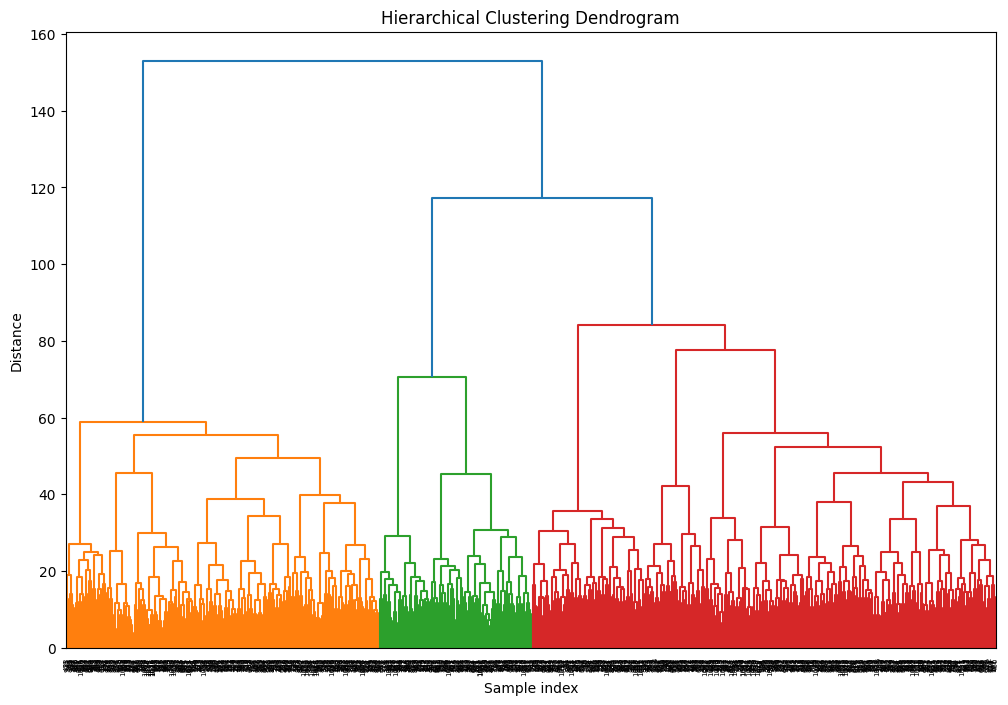

In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming df_vectors has already been correctly populated with numpy arrays
# Replace deprecated applymap with map used within an apply for element-wise operation
non_empty_columns = df_vectors.apply(lambda col: col.map(lambda x: x.size > 0)).any()

print("Columns with non-empty arrays:", non_empty_columns)

# Prepare the data for clustering by stacking arrays
# Replace direct .values usage with .tolist() to ensure compatibility
X = np.stack(df_vectors.apply(lambda x: np.concatenate(x.tolist()), axis=1))

# Perform clustering
clustering = AgglomerativeClustering(distance_threshold=0.5, n_clusters=None, linkage='ward')
labels = clustering.fit_predict(X)

# Generate and plot the dendrogram
Z = linkage(X, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
